In [1]:
import os
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
root = '../../../'

In [3]:
frames = [pd.read_csv(root + 'datasets/binary/samples/' + file, index_col=[0])
             for file in os.listdir(root + 'datasets/binary/samples/') if file.endswith(".csv")]

In [4]:
df_cicddos = pd.concat(frames)

In [5]:
df_cicddos.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10431,172.16.0.5-192.168.50.1-564-22216-17,172.16.0.5,564,192.168.50.1,22216,17,2018-12-01 11:09:22.974928,1,2,0,2736.0,0.0,1368.0,1368.0,1368.0,0.0,0.0,0.0,0.0,0.0,2.736000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,1368.0,1368.0,1368.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2052.0,1368.0,0.0,-2,0,0,0,0,0,0,2,2736,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
13090,172.16.0.5-192.168.50.1-1010-26305-17,172.16.0.5,1010,192.168.50.1,26305,17,2018-12-01 11:14:30.910567,1,2,0,2650.0,0.0,1325.0,1325.0,1325.0,0.0,0.0,0.0,0.0,0.0,2.650000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2.000000e+06,0.0,1325.0,1325.0,1325.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,1987.5,1325.0,0.0,0,0,0,0,0,0,0,2,2650,0,0,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
12990,172.16.0.5-192.168.50.1-608-52380-17,172.16.0.5,608,192.168.50.1,52380,17,2018-12-01 11:15:48.018936,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.472000e+09,1.000000e+06,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,28,0,1.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,28,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
19624,172.16.0.5-192.168.50.1-529-27632-17,172.16.0.5,529,192.168.50.1,27632,17,2018-12-01 11:10:27.232739,46,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,6.400000e+07,4.347826e+04,46.0,0.0,46.0,46.0,46.0,46.0,0.0,46.0,46.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,4.347826e+04,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,-2,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
20691,172.16.0.5-192.168.50.1-564-33365-17,172.16.0.5,564,192.168.50.1,33365,17,2018-12-01 11:09:08.542399,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,-2,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [6]:
df_cicddos.shape

(5280, 87)

In [7]:
df_cicddos[' Label'].value_counts()

BENIGN           2640
DrDoS_NetBIOS     240
DrDoS_MSSQL       240
TFTP              240
DrDoS_SNMP        240
DrDoS_SSDP        240
DrDoS_UDP         240
UDP-lag           240
Syn               240
DrDoS_DNS         240
DrDoS_LDAP        240
DrDoS_NTP         240
Name:  Label, dtype: int64

In [8]:
df_cicddos[' Label'].value_counts(normalize=True)

BENIGN           0.500000
DrDoS_NetBIOS    0.045455
DrDoS_MSSQL      0.045455
TFTP             0.045455
DrDoS_SNMP       0.045455
DrDoS_SSDP       0.045455
DrDoS_UDP        0.045455
UDP-lag          0.045455
Syn              0.045455
DrDoS_DNS        0.045455
DrDoS_LDAP       0.045455
DrDoS_NTP        0.045455
Name:  Label, dtype: float64

<AxesSubplot:>

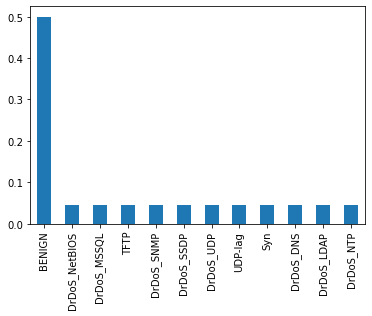

In [9]:
df_cicddos[' Label'].value_counts(normalize=True).plot(kind="bar")

In [10]:
df_cicddos.to_pickle(root + "pickles/general/binary_balanced_labels.pkl")

___
# Removing categorical data

In [11]:
df_cicddos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5280 entries, 10431 to 263
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Flow ID                       5280 non-null   object 
 1    Source IP                    5280 non-null   object 
 2    Source Port                  5280 non-null   int64  
 3    Destination IP               5280 non-null   object 
 4    Destination Port             5280 non-null   int64  
 5    Protocol                     5280 non-null   int64  
 6    Timestamp                    5280 non-null   object 
 7    Flow Duration                5280 non-null   int64  
 8    Total Fwd Packets            5280 non-null   int64  
 9    Total Backward Packets       5280 non-null   int64  
 10  Total Length of Fwd Packets   5280 non-null   float64
 11   Total Length of Bwd Packets  5280 non-null   float64
 12   Fwd Packet Length Max        5280 non-null   float64
 13  

In [12]:
df_cicddos.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [13]:
columns_to_remove = ['Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', 'SimillarHTTP', ' Inbound']

In [14]:
df_no_categorical = df_cicddos.drop(columns=columns_to_remove)

In [15]:
df_no_categorical.shape

(5280, 78)

In [16]:
df_no_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5280 entries, 10431 to 263
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Flow Duration                5280 non-null   int64  
 1    Total Fwd Packets            5280 non-null   int64  
 2    Total Backward Packets       5280 non-null   int64  
 3   Total Length of Fwd Packets   5280 non-null   float64
 4    Total Length of Bwd Packets  5280 non-null   float64
 5    Fwd Packet Length Max        5280 non-null   float64
 6    Fwd Packet Length Min        5280 non-null   float64
 7    Fwd Packet Length Mean       5280 non-null   float64
 8    Fwd Packet Length Std        5280 non-null   float64
 9   Bwd Packet Length Max         5280 non-null   float64
 10   Bwd Packet Length Min        5280 non-null   float64
 11   Bwd Packet Length Mean       5280 non-null   float64
 12   Bwd Packet Length Std        5280 non-null   float64
 13  

___
# Optimizing datatypes

In [17]:
integer_columns = df_no_categorical.select_dtypes(include="int64").columns
df_no_categorical[integer_columns] = df_no_categorical[integer_columns].astype("int32")

float_columns = df_no_categorical.select_dtypes(include="float64").columns
df_no_categorical[float_columns] = df_no_categorical[float_columns].astype("float32")

In [18]:
df_no_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5280 entries, 10431 to 263
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Flow Duration                5280 non-null   int32  
 1    Total Fwd Packets            5280 non-null   int32  
 2    Total Backward Packets       5280 non-null   int32  
 3   Total Length of Fwd Packets   5280 non-null   float32
 4    Total Length of Bwd Packets  5280 non-null   float32
 5    Fwd Packet Length Max        5280 non-null   float32
 6    Fwd Packet Length Min        5280 non-null   float32
 7    Fwd Packet Length Mean       5280 non-null   float32
 8    Fwd Packet Length Std        5280 non-null   float32
 9   Bwd Packet Length Max         5280 non-null   float32
 10   Bwd Packet Length Min        5280 non-null   float32
 11   Bwd Packet Length Mean       5280 non-null   float32
 12   Bwd Packet Length Std        5280 non-null   float32
 13  

___
# Replace infinities

In [19]:
df_optimized = df_no_categorical.drop(columns=[' Label']).copy()

In [20]:
df_optimized.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.280000e+03,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.216000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5280.000000,5280.000000,5280.0,5280.0,5280.0,5.280000e+03,5.280000e+03,5.280000e+03,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.0,5280.000000,5280.000000,5280.0,5280.000000,5280.000000,5280.000000,5280.0,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.0,5280.0,5280.0,5280.0,5280.0,5280.0,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5.280000e+03,5280.0,5280.0
mean,4.140589e+06,7.034659,2.766856,2240.386475,1166.618408,376.510406,311.035980,327.971344,22.914263,144.457962,18.501894,48.166332,37.209984,inf,inf,2.468121e+05,5.607724e+05,1.994020e+06,9.284076e+03,3983108.0,2.949397e+05,6.220429e+05,1.886818e+06,8.335700e+03,2.832834e+06,1.839498e+05,4.304146e+05,1382083.5,1.219886,0.066667,0.0,0.0,0.0,-5.200674e+07,-7.648293e+06,6.493707e+05,1171.429321,310.959290,472.327271,343.082306,45.549450,2.589525e+04,0.0,0.001705,0.066667,0.0,0.164205,0.221212,0.089583,0.0,0.453030,484.268616,327.971344,48.166332,-5.200674e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.034659,2240.386553,2.766856,1166.618371,3753.314015,1353.235227,4.617614,-2.777557e+07,3.340175e+04,6.466538e+03,4.051218e+04,2.905410e+04,1658886.0,8.016760e+04,1737865.5,1588123.5
std,1.855386e+07,20.742126,11.856038,8440.277344,11489.904297,523.294922,482.321899,478.317963,94.953377,562.282471,45.412582,167.489380,169.633774,NaN,NaN,1.199967e+06,2.469454e+06,9.084434e+06,2.360403e+05,18406590.0,1.156369e+06,2.582523e+06,8.784610e+06,2.358530e+05,1.615187e+07,1.473892e+06,2.782042e+06,8229148.0,5.710111,0.249467,0.0,0.0,0.0,3.286365e+08,1.272819e+08,8.819878e+05,19958.025391,482.368469,695.154724,477.398590,154.353531,1.396582e+05,0.0,0.041255,0.249467,0.0,0.370496,0.415102,0.285611,0.0,0.786121,713.100281,478.317963,167.489380,3.286365e+08,0.0,0.0,0.0,0.0,0.0,0.0,20.742126,8440.277300,11.856038,11489.904351,11484.883662,6795.637374,18.886441,1.695631e+08,3.326011e+05,7.918515e+04,3.635975e+05,3.264816e+05,8277317.5,9.524371e+05,8543617.0,8134707.5
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.393209e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,

In [21]:
df_optimized.replace([np.inf, -np.inf], np.nan, inplace=True)

In [22]:
df_optimized.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.280000e+03,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.143000e+03,5.143000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5280.000000,5280.000000,5280.0,5280.0,5280.0,5.280000e+03,5.280000e+03,5.280000e+03,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.0,5280.000000,5280.000000,5280.0,5280.000000,5280.000000,5280.000000,5280.0,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.0,5280.0,5280.0,5280.0,5280.0,5280.0,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5.280000e+03,5280.0,5280.0
mean,4.140589e+06,7.034659,2.766856,2240.386475,1166.618408,376.510406,311.035980,327.971344,22.914263,144.457962,18.501894,48.166332,37.209984,3.985259e+08,6.678713e+05,2.468121e+05,5.607724e+05,1.994020e+06,9.284076e+03,3983108.0,2.949397e+05,6.220429e+05,1.886818e+06,8.335700e+03,2.832834e+06,1.839498e+05,4.304146e+05,1382083.5,1.219886,0.066667,0.0,0.0,0.0,-5.200674e+07,-7.648293e+06,6.493707e+05,1171.429321,310.959290,472.327271,343.082306,45.549450,2.589525e+04,0.0,0.001705,0.066667,0.0,0.164205,0.221212,0.089583,0.0,0.453030,484.268616,327.971344,48.166332,-5.200674e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.034659,2240.386553,2.766856,1166.618371,3753.314015,1353.235227,4.617614,-2.777557e+07,3.340175e+04,6.466538e+03,4.051218e+04,2.905410e+04,1658886.0,8.016760e+04,1737865.5,1588123.5
std,1.855386e+07,20.742126,11.856038,8440.277344,11489.904297,523.294922,482.321899,478.317963,94.953377,562.282471,45.412582,167.489380,169.633774,8.148226e+08,8.867452e+05,1.199967e+06,2.469454e+06,9.084434e+06,2.360403e+05,18406590.0,1.156369e+06,2.582523e+06,8.784610e+06,2.358530e+05,1.615187e+07,1.473892e+06,2.782042e+06,8229148.0,5.710111,0.249467,0.0,0.0,0.0,3.286365e+08,1.272819e+08,8.819878e+05,19958.025391,482.368469,695.154724,477.398590,154.353531,1.396582e+05,0.0,0.041255,0.249467,0.0,0.370496,0.415102,0.285611,0.0,0.786121,713.100281,478.317963,167.489380,3.286365e+08,0.0,0.0,0.0,0.0,0.0,0.0,20.742126,8440.277300,11.856038,11489.904351,11484.883662,6795.637374,18.886441,1.695631e+08,3.326011e+05,7.918515e+04,3.635975e+05,3.264816e+05,8277317.5,9.524371e+05,8543617.0,8134707.5
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.393209e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0

In [23]:
df_optimized.isnull().sum().sort_values(ascending=False)

 Flow Packets/s          137
Flow Bytes/s             137
 Flow Duration             0
 Bwd Avg Bytes/Bulk        0
 Fwd Avg Packets/Bulk      0
                        ... 
 Bwd IAT Std               0
 Bwd IAT Mean              0
Bwd IAT Total              0
 Fwd IAT Min               0
 Idle Min                  0
Length: 77, dtype: int64

In [24]:
df_optimized.fillna(df_optimized.max(), inplace=True)

In [25]:
df_optimized.isnull().sum().sort_values(ascending=False)

 Flow Duration           0
 ECE Flag Count          0
 Fwd Avg Packets/Bulk    0
Fwd Avg Bytes/Bulk       0
 Fwd Header Length.1     0
                        ..
 Bwd IAT Mean            0
Bwd IAT Total            0
 Fwd IAT Min             0
 Fwd IAT Max             0
 Idle Min                0
Length: 77, dtype: int64

___
# Fliping negative numbers

In [26]:
df_optimized.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.280000e+03,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5280.000000,5280.000000,5280.0,5280.0,5280.0,5.280000e+03,5.280000e+03,5.280000e+03,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.0,5280.000000,5280.000000,5280.0,5280.000000,5280.000000,5280.000000,5280.0,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.0,5280.0,5280.0,5280.0,5280.0,5280.0,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5.280000e+03,5280.0,5280.0
mean,4.140589e+06,7.034659,2.766856,2240.386475,1166.618408,376.510406,311.035980,327.971344,22.914263,144.457962,18.501894,48.166332,37.209984,4.645733e+08,7.283829e+05,2.468121e+05,5.607724e+05,1.994020e+06,9.284076e+03,3983108.0,2.949397e+05,6.220429e+05,1.886818e+06,8.335700e+03,2.832834e+06,1.839498e+05,4.304146e+05,1382083.5,1.219886,0.066667,0.0,0.0,0.0,-5.200674e+07,-7.648293e+06,6.493707e+05,1171.429321,310.959290,472.327271,343.082306,45.549450,2.589525e+04,0.0,0.001705,0.066667,0.0,0.164205,0.221212,0.089583,0.0,0.453030,484.268616,327.971344,48.166332,-5.200674e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.034659,2240.386553,2.766856,1166.618371,3753.314015,1353.235227,4.617614,-2.777557e+07,3.340175e+04,6.466538e+03,4.051218e+04,2.905410e+04,1658886.0,8.016760e+04,1737865.5,1588123.5
std,1.855386e+07,20.742126,11.856038,8440.277344,11489.904297,523.294922,482.321899,478.317963,94.953377,562.282471,45.412582,167.489380,169.633774,9.002756e+08,9.504714e+05,1.199967e+06,2.469454e+06,9.084434e+06,2.360403e+05,18406590.0,1.156369e+06,2.582523e+06,8.784610e+06,2.358530e+05,1.615187e+07,1.473892e+06,2.782042e+06,8229148.0,5.710111,0.249467,0.0,0.0,0.0,3.286365e+08,1.272819e+08,8.819878e+05,19958.025391,482.368469,695.154724,477.398590,154.353531,1.396582e+05,0.0,0.041255,0.249467,0.0,0.370496,0.415102,0.285611,0.0,0.786121,713.100281,478.317963,167.489380,3.286365e+08,0.0,0.0,0.0,0.0,0.0,0.0,20.742126,8440.277300,11.856038,11489.904351,11484.883662,6795.637374,18.886441,1.695631e+08,3.326011e+05,7.918515e+04,3.635975e+05,3.264816e+05,8277317.5,9.524371e+05,8543617.0,8134707.5
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.393209e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0

In [27]:
# Check which columns have negative numbers
negatives = df_optimized.columns[(df_optimized < 0).any()]
negatives

Index([' Fwd Header Length', ' Bwd Header Length', ' Fwd Header Length.1',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' min_seg_size_forward'],
      dtype='object')

In [28]:
df_optimized[negatives]

,Fwd Header Length,Bwd Header Length,Fwd Header Length.1,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
Unnamed: 0,,,,,,
10431,-2,0,-2,-1,-1,-1
13090,0,0,0,-1,-1,0
12990,28,0,28,-1,-1,14
19624,-2,0,-2,-1,-1,-1
20691,-2,0,-2,-1,-1,-1
...,...,...,...,...,...,...
320531,64,64,64,-1,-1,32
280534,40,40,40,-1,-1,20
44489,40,40,40,-1,-1,20


In [29]:
df_optimized[negatives] = df_optimized[negatives].abs()

In [30]:
df_optimized.columns[(df_optimized < 0).any()]

Index([], dtype='object')

In [31]:
df_optimized.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.280000e+03,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5280.000000,5280.000000,5280.0,5280.0,5280.0,5.280000e+03,5.280000e+03,5.280000e+03,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.0,5280.000000,5280.000000,5280.0,5280.000000,5280.000000,5280.000000,5280.0,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.0,5280.0,5280.0,5280.0,5280.0,5280.0,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5.280000e+03,5280.0,5.280000e+03,5280.0,5280.0
mean,4.140589e+06,7.034659,2.766856,2240.386475,1166.618408,376.510406,311.035980,327.971344,22.914263,144.457962,18.501894,48.166332,37.209984,4.645733e+08,7.283829e+05,2.468121e+05,5.607724e+05,1.994020e+06,9.284076e+03,3983108.0,2.949397e+05,6.220429e+05,1.886818e+06,8.335700e+03,2.832834e+06,1.839498e+05,4.304146e+05,1382083.5,1.219886,0.066667,0.0,0.0,0.0,5.262501e+07,7.648420e+06,6.493707e+05,1171.429321,310.959290,472.327271,343.082306,45.549450,2.589525e+04,0.0,0.001705,0.066667,0.0,0.164205,0.221212,0.089583,0.0,0.453030,484.268616,327.971344,48.166332,5.262501e+07,0.0,0.0,0.0,0.0,0.0,0.0,7.034659,2240.386553,2.766856,1166.618371,3754.548106,1354.782576,4.617614,2.777565e+07,3.340175e+04,6.466538e+03,4.051218e+04,2.905410e+04,1658886.0,8.016760e+04,1737865.5,1588123.5
std,1.855386e+07,20.742126,11.856038,8440.277344,11489.904297,523.294922,482.321899,478.317963,94.953377,562.282471,45.412582,167.489380,169.633774,9.002756e+08,9.504714e+05,1.199967e+06,2.469454e+06,9.084434e+06,2.360403e+05,18406590.0,1.156369e+06,2.582523e+06,8.784610e+06,2.358530e+05,1.615187e+07,1.473892e+06,2.782042e+06,8229148.0,5.710111,0.249467,0.0,0.0,0.0,3.285380e+08,1.272819e+08,8.819878e+05,19958.025391,482.368469,695.154724,477.398590,154.353531,1.396582e+05,0.0,0.041255,0.249467,0.0,0.370496,0.415102,0.285611,0.0,0.786121,713.100281,478.317963,167.489380,3.285380e+08,0.0,0.0,0.0,0.0,0.0,0.0,20.742126,8440.277300,11.856038,11489.904351,11484.480205,6795.329004,18.886441,1.695630e+08,3.326011e+05,7.918515e+04,3.635975e+05,3.264816e+05,8277317.5,9.524371e+05,8543617.0,8134707.5
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.393209e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

___
# Save the dataset

In [32]:
df_optimized[' Label'] = df_no_categorical[' Label']
df_optimized.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10431,1,2,0,2736.0,0.0,1368.0,1368.0,1368.0,0.0,0.0,0.0,0.0,0.0,2.736000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2,0,2.000000e+06,0.0,1368.0,1368.0,1368.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2052.0,1368.0,0.0,2,0,0,0,0,0,0,2,2736,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
13090,1,2,0,2650.0,0.0,1325.0,1325.0,1325.0,0.0,0.0,0.0,0.0,0.0,2.650000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2.000000e+06,0.0,1325.0,1325.0,1325.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,1987.5,1325.0,0.0,0,0,0,0,0,0,0,2,2650,0,0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
12990,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.472000e+09,1.000000e+06,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,28,0,1.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,28,0,0,0,0,0,0,2,2944,0,0,1,1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
19624,46,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,6.400000e+07,4.347826e+04,46.0,0.0,46.0,46.0,46.0,46.0,0.0,46.0,46.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2,0,4.347826e+04,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,2,0,0,0,0,0,0,2,2944,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
20691,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,2,0,2.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,2,0,0,0,0,0,0,2,2944,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS


In [33]:
df_optimized.shape

(5280, 78)

In [34]:
df_optimized.to_csv(root + 'datasets/binary/processed/CICDDoS_pre.csv')